# Homework 5 writeups
**Name:** Oorjit Chowdhary

**Section:** AMATH 301 B

## Problem 1

### Part (a) - Plot

Optimization terminated successfully.
         Current function value: 3861.342588
         Iterations: 140
         Function evaluations: 248
Optimization terminated successfully.
         Current function value: 710.242620
         Iterations: 1091
         Function evaluations: 1676


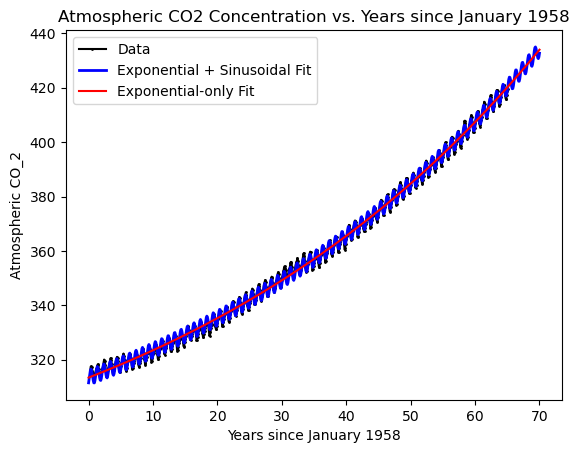

Exponential-only fit sum squared error: 3861.3425884150547
Exponential + sinusoidal fit sum squared error: 710.2426198778329


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Load data
M = np.genfromtxt('CO2_data.csv', delimiter=',')

# Plot data
t = M[:, 0]
CO2 = M[:, 1]

plt.plot(t, CO2, '-k.', markersize=2)

def sumSquaredError(a, b, r):
   y = lambda t: a + b*np.exp(r*t)
   error = sum((y(t) - CO2)**2)
   return error

adapter = lambda p: sumSquaredError(p[0], p[1], p[2])
guess = np.array([300, 30, 0.03])

optimal_params = scipy.optimize.fmin(adapter, guess)
A4 = optimal_params

# Sum squared error for exponential-only fit
sumSquaredError = adapter(optimal_params)
A5 = sumSquaredError

# Plot the exponential + sinusoidal fit
def sumSquaredError(a, b, r, c, d, e):
    y = lambda t: a + b*np.exp(r*t) + c*np.sin(d * (t-e))
    error = sum((y(t) - CO2)**2)
    return error

adapter = lambda p: sumSquaredError(p[0], p[1], p[2], p[3], p[4], p[5])
guess = np.append(A4, [-5, 4, 0])

optimal_params = scipy.optimize.fmin(adapter, guess, maxiter=2000)
A9 = optimal_params

# Sum squared error for exponential + sinusoidal fit
sumSquaredError = adapter(optimal_params)
A10 = sumSquaredError

t = np.linspace(0, 70, 779)
y = lambda t: A9[0] + A9[1]*np.exp(A9[2]*t) + A9[3]*np.sin(A9[4] * (t-A9[5]))

plt.plot(t, y(t), '-b', linewidth=2)

# Plot the exponential-only fit
t = np.linspace(0, 70, 779)
y = lambda t: A4[0] + A4[1]*np.exp(A4[2]*t)

plt.plot(t, y(t), '-r')

# label, legends, etc. below
plt.xlabel('Years since January 1958')
plt.ylabel('Atmospheric CO_2')
plt.title('Atmospheric CO2 Concentration vs. Years since January 1958')
plt.legend(['Data', 'Exponential + Sinusoidal Fit', 'Exponential-only Fit'])
plt.show()

# Errors
print("Exponential-only fit sum squared error:", A5)
print("Exponential + sinusoidal fit sum squared error:", A10)

### Part (b) - Discussion of error
I found that the sum squared error for the exponential-only fit is 3861.3425884150547, which is more than 5 times the sum squared error for the exponential + sinusoidal fit (710.2426198778329). In the plot, we can see the smaller error for exponential + sinusoidal fit justified as that blue curve fits almost accurately superimposes the data curve, leaving very low deviations to be accounted for in the sum squared error. On the other hand, the exponential-only fit captures the overall trend of the data but doesn't fit the data as well as the other curve, leading to higher deviations and hence a higher sum squared error.

### Part (c) - Prediction
To predict the amount of atmospheric CO2 at Mauna Loa for January 2023, we need to evaluate the general trend around the point t = 65, which falls outside the data points. As the exponential + sinusoidal curve fits as well as extrapolates the trend well, we can rely on it for a prediction. The best prediction is made by the model that captures the overall trend of the data and is able to extrapolate it. Hence, I would use the blue curve to make a prediction for the atmospheric CO2 at Mauna Loa for January 2023.

## Problem 2

### Part (a) - Plot

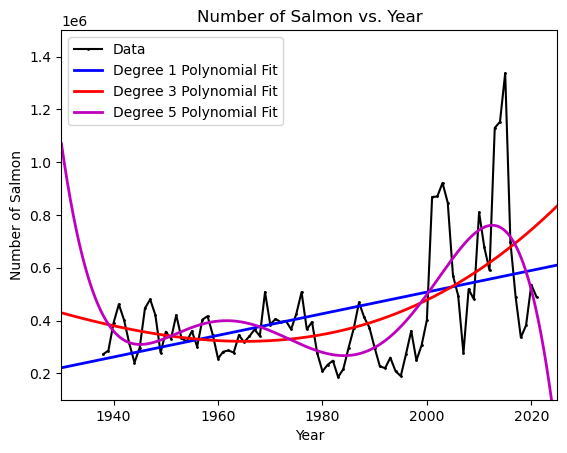

In [7]:
M = np.genfromtxt('salmon_data.csv', delimiter=',')

year = M[:, 0]
salmon = M[:, 1]

# Plot data
plt.plot(year, salmon, '-k.', markersize=2)
plt.xlim(1930, 2025)
plt.ylim(100000, 1500000)

# Degree 1, 3, and 5 polynomial fits
A11 = np.polyfit(year, salmon, 1)
A12 = np.polyfit(year, salmon, 3)
A13 = np.polyfit(year, salmon, 5)

p1 = lambda t: np.polyval(A11, t)
p3 = lambda t: np.polyval(A12, t)
p5 = lambda t: np.polyval(A13, t)

# Plot the polynomial fits
t = np.linspace(1930, 2025, 1000)

plt.plot(t, p1(t), '-b', linewidth=2)
plt.plot(t, p3(t), '-r', linewidth=2)
plt.plot(t, p5(t), '-m', linewidth=2)

# label, legends, etc. below
plt.xlabel('Year')
plt.ylabel('Number of Salmon')
plt.title('Number of Salmon vs. Year')
plt.xlim(1930, 2025)
plt.ylim(100000, 1500000)
plt.legend(['Data', 'Degree 1 Polynomial Fit', 'Degree 3 Polynomial Fit', 'Degree 5 Polynomial Fit'])
plt.show()

### Part (b) - Line of best fit discussion
The line of best fit is represented by the degree-1 polynomial fit curve on the graph, and it tells us about the overall trend of the salmon population, which is **generally increasing** over the timeframe from 1930 to 2025. Taking a higher step size to empirically validate this overall trend, we can see from the data curve that the salmon population in 1990 is more than that of 1960, which is more than that of 1930.

### Part (c) - Accuracy of predictions
Comparing the degree 1, 3, and 5 polynomials for the salmon population in Problem 1, I found the **degree-3 polynomial to have the most accurate prediction** with the least percentage error (3.497490461775231%). The least accurate prediction was given by the degree-5 polynomial, having a percentage error of 55.66238350973509%.

In [8]:
exact =  752638 # The exact number of salmon in 2022

p1 = np.polyval(A11, 2022)
p3 = np.polyval(A12, 2022)
p5 = np.polyval(A13, 2022)

# Percentage errors
err1 = np.abs(p1 - exact) / exact
err2 = np.abs(p3 - exact) / exact
err3 = np.abs(p5 - exact) / exact

print("Degree-1 polynomial fit error:", str(err1 * 100) + "%")
print("Degree-3 polynomial fit error:", str(err2 * 100) + "%")
print("Degree-5 polynomial fit error:", str(err3 * 100) + "%")

Degree-1 polynomial fit error: 20.570529169996828%
Degree-3 polynomial fit error: 3.497490461775231%
Degree-5 polynomial fit error: 55.66238350973509%


### Part (d) - Predicting Salmon populations in 2050
Based on the percentage errors calculated for modeling the salmon population in 2022, I would **trust the degree-3 polynomial model the most** for this prediction. The errors for the different models help us better understand the cases of underfitting and overfitting, as the degree-1 polynomial underfits the data and fails to reasonably predict the population while the degree-5 polynomial overfits and loses its predictive power. The degree-3 polynomial, on the other hand, is able to capture the overall trend of the data and gives us the closest estimate of the 2022 population.

The calculations below give us the predictions by each model for the salmon population in 2050. Comparing these values based on the existing data curve and its existing trend, we can see the degree-3 polynomial provides us with a reasonable prediction, while degree-5 provides an incorrect negative prediction.

In [9]:
# Salmon population predictions for 2050
p1 = np.polyval(A11, 2050)
p3 = np.polyval(A12, 2050)
p5 = np.polyval(A13, 2050)

print("Degree 1 polynomial fit prediction for 2050 salmon population:", p1)
print("Degree 3 polynomial fit prediction for 2050 salmon population:", p3)
print("Degree 5 polynomial fit prediction for 2050 salmon population:", p5)

Degree 1 polynomial fit prediction for 2050 salmon population: 712512.5765549587
Degree 3 polynomial fit prediction for 2050 salmon population: 1458352.528227806
Degree 5 polynomial fit prediction for 2050 salmon population: -17028525.5
